In [ ]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset path
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning Group Project/images/test'

# List the classes
classes = os.listdir(dataset_path)
print("Classes:", classes)

# Initialize lists to store data
image_paths = []
image_classes = []
image_sizes = []

# Loop through each class directory
for cls in classes:
    class_dir = os.path.join(dataset_path, cls)
    if not os.path.isdir(class_dir):  # Skip if not a directory
        continue
    images = os.listdir(class_dir)
    for img_name in images:
        img_path = os.path.join(class_dir, img_name)
        image = cv2.imread(img_path)
        if image is not None:
            image_paths.append(img_path)
            image_classes.append(cls)
            image_sizes.append(image.shape)

# Create a DataFrame
df = pd.DataFrame({
    'Path': image_paths,
    'Class': image_classes,
    'Size': image_sizes
})

print(df.head())


Classes: ['.DS_Store', 'Goldfish', 'Jellyfish', 'Fish', 'Harbor seal', 'Sea turtle', 'Lobster', 'Starfish', 'Oyster', 'Squid']
                                                Path     Class            Size
0  /content/drive/MyDrive/Colab Notebooks/Deep Le...  Goldfish  (852, 1024, 3)
1  /content/drive/MyDrive/Colab Notebooks/Deep Le...  Goldfish  (768, 1024, 3)
2  /content/drive/MyDrive/Colab Notebooks/Deep Le...  Goldfish  (768, 1024, 3)
3  /content/drive/MyDrive/Colab Notebooks/Deep Le...  Goldfish  (768, 1024, 3)
4  /content/drive/MyDrive/Colab Notebooks/Deep Le...  Goldfish  (683, 1024, 3)


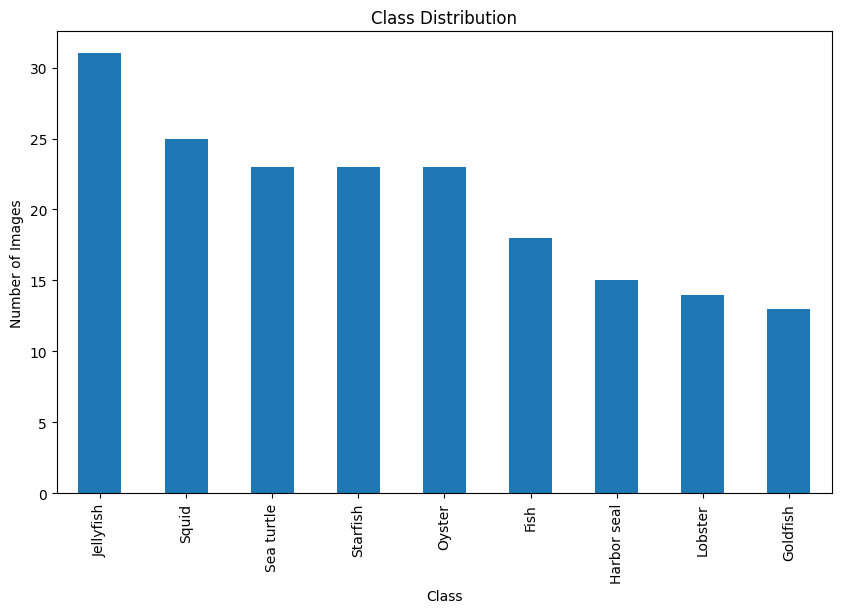

In [ ]:
# Class distribution
class_distribution = df['Class'].value_counts()
plt.figure(figsize=(10, 6))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()

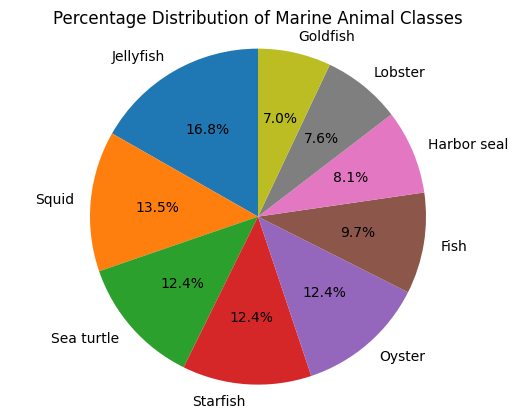

In [ ]:
# Calculate class distribution as percentages
class_distribution_percentages = df['Class'].value_counts(normalize=True) * 100

# Plot
fig, ax = plt.subplots()
ax.pie(class_distribution_percentages, labels=class_distribution_percentages.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage Distribution of Marine Animal Classes')
plt.show()

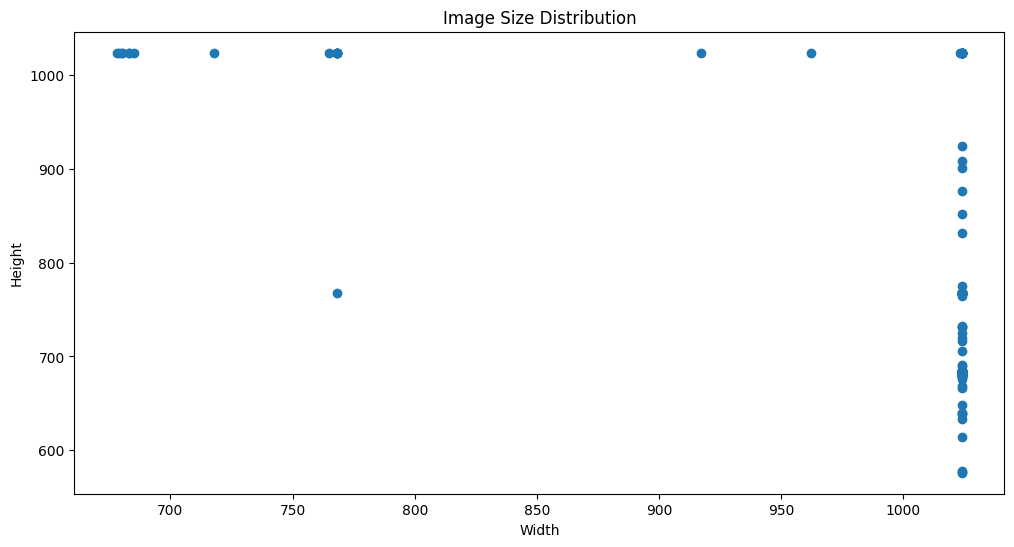

In [ ]:
# Extract width and height from Size
df['Width'] = df['Size'].apply(lambda x: x[1])
df['Height'] = df['Size'].apply(lambda x: x[0])

plt.figure(figsize=(12, 6))
plt.scatter(df['Width'], df['Height'])
plt.title('Image Size Distribution')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()
